# Testing qipQST

In [35]:
%load_ext autoreload

%autoreload 2
import qipQST as qst
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('dark_background')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
tau = 0.1
guess = 0

In [37]:
# idlePulse = qst.ConstantPulse(tau, 0, 0, 0)
# idleGate = qst.QuantumGate()
# idleGate.appendPulse(idlePulse)

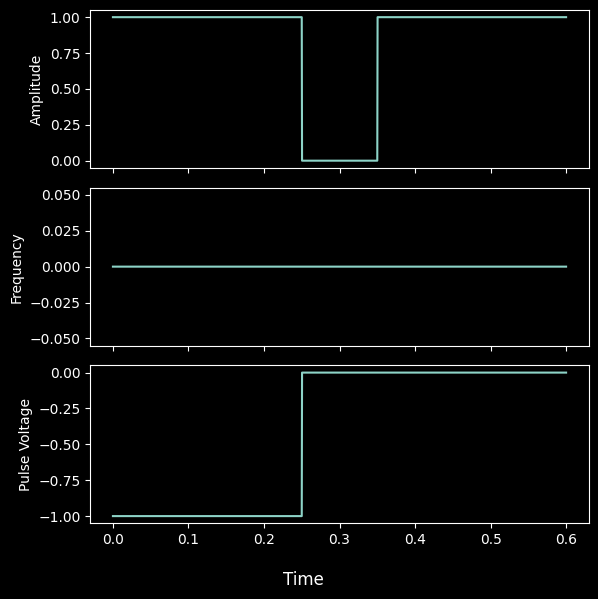

In [38]:
ramseyCircuit = qst.QuantumCircuit(guess)
ramseyCircuit.appendGate(qst.PiO2X())
ramseyCircuit.appendGate(qst.IdleGate(tau))
ramseyCircuit.appendGate(qst.PiO2Y())
ramseyCircuit.plotCircuitWaveform()

In [39]:
testSimulator = qst.PulseSimulator()
testSimulator.setQubit(qst.Qubit(0))
testSimulator.setCircuit(ramseyCircuit)
testSimulator.setTimeSteps(1, 10000)

In [40]:
testResult = testSimulator.simulateCircuit(1, 10000)

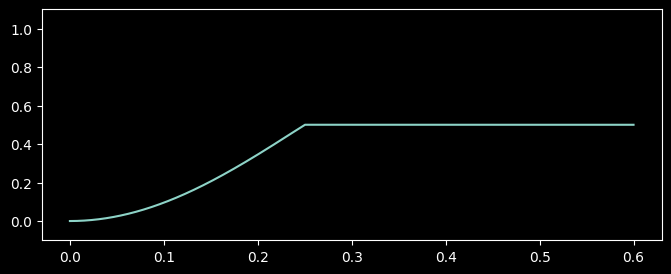

In [41]:
testResult.plotStates()

# Ramsey

## Sweep Guess

In [126]:
guessResonances = np.linspace(-2, 2, 101).tolist()

In [127]:
guessResult = qst.ramsey.sweepGuess(guessResonances, 1.5, 100, "X")

100%|██████████| 101/101 [00:00<00:00, 190.01it/s]


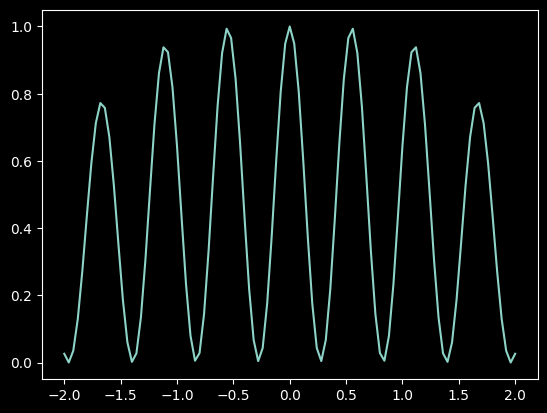

In [128]:
plt.plot(guessResonances, guessResult)
plt.show()

## Sweep Tau

In [103]:
taus = np.linspace(0, 10, 101).tolist()

In [104]:
tauResults = qst.ramsey.sweepTau(taus, 0.1)

100%|██████████| 101/101 [00:03<00:00, 31.63it/s]


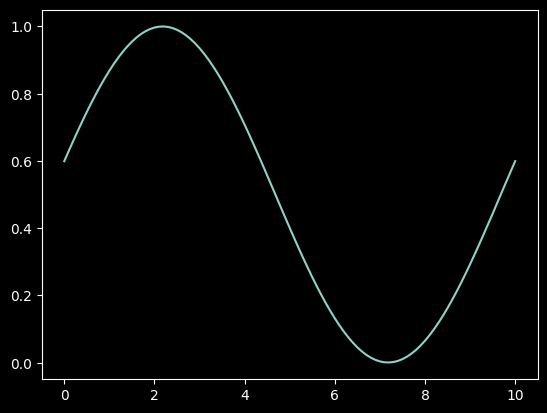

In [105]:
plt.plot(taus, tauResults)
plt.show()

## Sweep Both

In [129]:
guessResonances = np.linspace(-3, 3, 101).tolist()
taus = np.linspace(0, 2, 101).tolist()

In [130]:
bothResultsX = qst.ramsey.sweepGuessAndTau(taus, guessResonances, numIterations=100)
bothResultsY = qst.ramsey.sweepGuessAndTau(taus, guessResonances, numIterations=100, secondGate="Y")

100%|██████████| 101/101 [00:40<00:00,  2.48it/s]


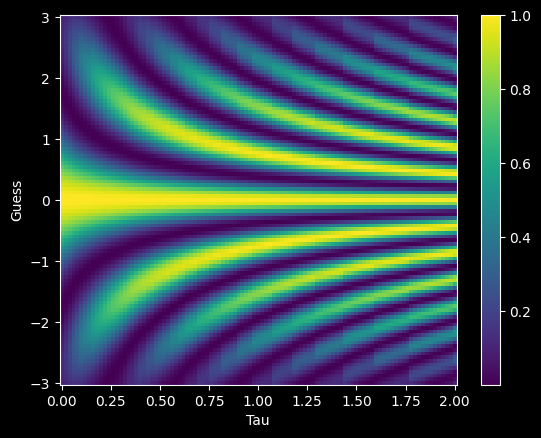

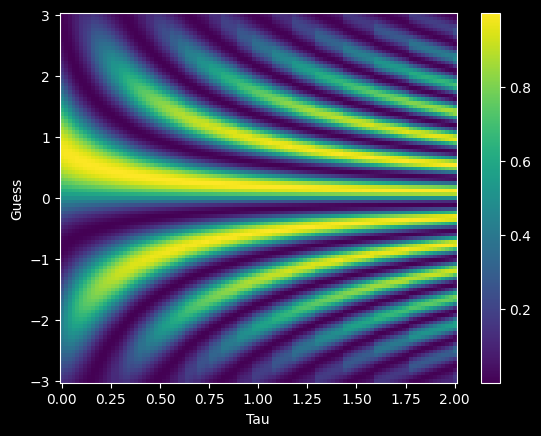

In [131]:
X, Y = np.meshgrid(taus, guessResonances)
pcolorm = plt.pcolormesh(X, Y, bothResultsX, shading="nearest")
plt.colorbar(pcolorm)
plt.ylabel("Guess")
plt.xlabel("Tau")
plt.title("")
plt.show()

pcolorm = plt.pcolormesh(X, Y, bothResultsY, shading="nearest")
plt.colorbar(pcolorm)
plt.ylabel("Guess")
plt.xlabel("Tau")
plt.title("")
plt.show()